#                               PROJET IA MASTER 1 BIG DATA ET MANAGEMENT

Poroni and Elvis  est une entreprise privée aux États-Unis. En raison de la croissance remarquable de l'industrie des taxi au cours des dernières années et de plusieurs acteurs clés du marché, d'énormes investissements sont prévus et, conformément à sa stratégie Go-to-Market (plan d'action d'entreprise, visant à procéder avec succès au lancement d'un produit ou service. Sa démarche consiste à mobiliser les ressources internes et externes d'une entreprise pour augmenter le taux de réussite de l'opération), ils souhaitent comprendre le marché avant de prendre décision finale.
Les investisseurs souhaitent utiliser vos informations afin d'identifier la bonne entreprise pour réaliser leur investissement.

Base de données
4 ensembles de données individuelles ont été fournies. La périodedes enrégistrement va du 31/01/2016 au 31/12/2018. Vous trouverez ci-dessous la liste des ensembles de données fournies pour l'analyse :

Cab_Data.csv - ce fichier contient les détails de la transaction pour 2 compagnies de taxi

Customer_ID.csv - il s'agit d'une table de mappage qui contient un identifiant unique reliant les détails démographiques du client

Transaction_ID.csv - il s'agit d'une table de mappage qui contient le mappage de la transaction au client et le mode de paiement

City.csv - ce fichier contient la liste des villes américaines, leur population et le nombre d'utilisateurs de taxi

# Scraping des données sur le site de l'entreprise des données

Scraping des fichiers CSV sur une plate-forme de UCI Machine Learning Repository

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import mechanicalsoup
from urllib.request import urlretrieve

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
url = "https://archive.ics.uci.edu/ml/datasets.php"
html = urllib.request.urlopen(url, context=ctx.read())
soup = BeautifulSoup(html, 'html.parser')
html = soup.prettify('UTF-8')

In [ ]:
url_down= "https://archive.ics.uci.edu/ml/machine-learning-databases/00192/"
urlretrieve(url_down, "Cab_data.csv")
url_down= "https://archive.ics.uci.edu/ml/machine-learning-databases/00196/"
urlretrieve(url_down, "City.csv")
url_down= "https://archive.ics.uci.edu/ml/machine-learning-databases/00206/"
urlretrieve(url_down, "Customer.csv")
url_down= "https://archive.ics.uci.edu/ml/machine-learning-databases/00314/"
urlretrieve(url_down, "Transaction.csv")

# Importation et visualisation des données
Tout d'abord nous allons importer les librairies nécessaires 
Ensuite importer les datasets

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
pip install chart-studio

In [1]:
# I imported following python libraries to utilize in EDA process.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.graph_objects as go
import datetime
from datetime import datetime, timedelta
%matplotlib inline
#os.chdir("/content/drive/MyDrive/DataSets/DataSets")
#os.chdir("/home/poroni/projet IA/DataSets_Week_2-main")

In [2]:
# Import etVisualisation du fichier Cab_Data.
cab = pd.read_csv("Cab_data_Old.csv")
print('Cab dataset has {} entries , {} features'.format(cab.shape[0] ,cab.shape[1]))
cab.head()

Cab dataset has 359392 entries , 7 features


Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [3]:
## Importation et Visualisation du fichier City.
city = pd.read_csv("City.csv")
print('Cab dataset has {} entries , {} features'.format(city.shape[0] ,city.shape[1]))
city.head()

Cab dataset has 20 entries , 3 features


City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [4]:
# Importation et Visualisation du fichier Customer.
customer = pd.read_csv("Customer_ID.csv")
print('Cab dataset has {} entries , {} features'.format(customer.shape[0] ,customer.shape[1]))
customer.head()
#print("\n \n{}".format(customer.dtypes))

Cab dataset has 49171 entries , 4 features


Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [5]:
# Importation et Visualisation du fichier Transaction.
transaction = pd.read_csv("Transaction_ID.csv")
print('Cab dataset has {} entries , {} features'.format(transaction.shape[0] ,transaction.shape[1]))
transaction.head()


Cab dataset has 440098 entries , 3 features


Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

# Analyse et netoyage de données
    Ce volet consiste a analyser les données et supprimer les valeurs nulles ou manquantes

In [6]:
# Analyse de "cab"
cab.info()
cab.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 16.5+ MB


(359392, 7)

In [7]:
# Visualisons le nombre de données manquantes pour chaque variable
cab.isna().sum()


Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [8]:
#On se sent effrayé par la manière dont la date a été enrégistrée. Du coup on va visualiser cette colonne
print(cab["Date of Travel"].dtypes)
# On peut remarquer que le format n'est pas celui recommandé pour indiquer la date.
# Nous allons donc le convertir

int64


In [9]:
# Importons premièrement le package nécessaire pour effectuer cette conversion

In [10]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date



In [11]:
cab['Date of Travel']=cab['Date of Travel'].apply(lambda x:to_date_format(x))

In [12]:
cab.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-01  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-06  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-02  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [13]:
# revisualisons le type de la variable "Date of Travel"
print(cab['Date of Travel'].dtypes)

datetime64[ns]


In [14]:
# On peut classifier nos données en fonction de la date par ordre croissant

In [15]:
cab = cab.sort_values(by = ['Date of Travel'])

cab = cab.reset_index(drop = True )

print(cab.shape)
cab.head(10)

(359392, 7)


Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-01  Yellow Cab  WASHINGTON DC         10.20   
1        10000640     2016-01-01  Yellow Cab     CHICAGO IL         15.60   
2        10000635     2016-01-01  Yellow Cab     CHICAGO IL         25.08   
3        10001001     2016-01-01  Yellow Cab    NEW YORK NY         46.80   
4        10000171     2016-01-01    Pink Cab   SAN DIEGO CA         14.28   
5        10001009     2016-01-01  Yellow Cab     PHOENIX AZ         30.00   
6        10000605     2016-01-01  Yellow Cab     CHICAGO IL         35.52   
7        10001014     2016-01-01  Yellow Cab  SACRAMENTO CA         38.00   
8        10000600     2016-01-01  Yellow Cab     CHICAGO IL         23.75   
9        10000182     2016-01-01    Pink Cab   SAN DIEGO CA          2.36   

   Price Charged  Cost of Trip  
0         202.54      135.8640  
1         374.66      209.6640  
2         532.83      337.0752  
3        1391.91      595.2960  
4         269.15      147.0840  
5        1000.52      403.2000  
6         760.86      430.5024  
7        1065.42      547.2000  
8         531.25      336.3000  
9          47.89       23.6000

In [16]:
# On peut faire une visions statistique élémentaire globale sur notre jeu de données avec la fonction roun pour plus joli
round(cab.describe(include = 'all'))

<ipython-input-16-9633a08ede6b>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  round(cab.describe(include = 'all'))


Transaction ID       Date of Travel     Company         City  \
count         359392.0               359392      359392       359392   
unique             NaN                 1095           2           19   
top                NaN  2018-01-04 00:00:00  Yellow Cab  NEW YORK NY   
freq               NaN                 2022      274681        99885   
first              NaN  2016-01-01 00:00:00         NaN          NaN   
last               NaN  2018-12-30 00:00:00         NaN          NaN   
mean        10220761.0                  NaN         NaN          NaN   
std           126806.0                  NaN         NaN          NaN   
min         10000011.0                  NaN         NaN          NaN   
25%         10110810.0                  NaN         NaN          NaN   
50%         10221036.0                  NaN         NaN          NaN   
75%         10330937.0                  NaN         NaN          NaN   
max         10440107.0                  NaN         NaN          NaN   

        KM Travelled  Price Charged  Cost of Trip  
count       359392.0       359392.0      359392.0  
unique           NaN            NaN           NaN  
top              NaN            NaN           NaN  
freq             NaN            NaN           NaN  
first            NaN            NaN           NaN  
last             NaN            NaN           NaN  
mean            23.0          423.0         286.0  
std             12.0          274.0         158.0  
min              2.0           16.0          19.0  
25%             12.0          206.0         151.0  
50%             22.0          386.0         282.0  
75%             33.0          584.0         414.0  
max             48.0         2048.0         691.0

In [17]:
# Analyse de "city"
city.info()
city.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 304.0+ bytes


(20, 3)

In [18]:
# Verification de valeurs nulles
cab.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [19]:
# On remarque la présence des virgules entre les valeurs des variables Population et Users.
# Pour cela nous allons les transformer en float afin de ne pas avoir d'ennuie lors de l'élaboration des calculs statistiques
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
#city['Population'] = city['Population'].astype(float)
#city['Users'] = city['Users'].astype(float)
city.head(10)

City Population     Users
0     NEW YORK NY   8405837    302149 
1      CHICAGO IL   1955130    164468 
2  LOS ANGELES CA   1595037    144132 
3        MIAMI FL   1339155     17675 
4  SILICON VALLEY   1177609     27247 
5   ORANGE COUNTY   1030185     12994 
6    SAN DIEGO CA    959307     69995 
7      PHOENIX AZ    943999      6133 
8       DALLAS TX    942908     22157 
9      ATLANTA GA    814885     24701

In [20]:
# Analyse de "customer"
customer.info()
customer.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


(49171, 4)

In [21]:
# Verification de valeur null
customer.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [22]:
# Analyse de "transaction"
transaction.info()
transaction.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 8.4+ MB


(440098, 3)

In [23]:
# Verification de valeur null
transaction.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [24]:
# print("\n \n{}".format(transaction.dtypes) )

# Fusionner les dataset
 On peut maintenant fusionner nos 4 Datasets en un seul afin d'avoir une vue générale des données
 Pour ce faire, afin d'avoir face à nous toutes les colonnes, on va afficher
juste les premières lignes de chacun de nos 4 datasets.

In [25]:
cab.head(1)

Transaction ID Date of Travel     Company           City  KM Travelled  \
0        10001340     2016-01-01  Yellow Cab  WASHINGTON DC          10.2   

   Price Charged  Cost of Trip  
0         202.54       135.864

In [26]:
customer.head(1)

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813

In [27]:
city.head(1)

City Population     Users
0  NEW YORK NY   8405837    302149

In [28]:
transaction.head(1)

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card

In [29]:
principal= cab.merge(transaction, on="Transaction ID").merge(city, on= "City").merge(customer, on= "Customer ID")

print("Le Dataframe principal  {} enrégistrements, {} colonnes, {} valeurs manquantes".format(principal.shape[0], principal.shape[1],principal.isna().sum().sum()))

principal.dtypes

Le Dataframe principal  359392 enrégistrements, 14 colonnes, 0 valeurs manquantes


Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Population                    object
Users                         object
Gender                        object
Age                            int64
Income (USD/Month)             int64
dtype: object

In [30]:
# remplacer espace dans les noms de colonne par '_' 

for column in principal.columns:
    if ' ' in column:
        principal = principal.rename(columns={column:column.replace(' ','_')})


In [31]:
# Converted some columns from object to category or int64 datatypes to work with appropriate ones.
# Converted Data of Travel column to datetime object.

principal['Date_of_Travel'] = pd.to_datetime(principal['Date_of_Travel'])

for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    
        principal[column] = principal[column].astype('category')
        
        
for column in ["Population", "Users" ] :
    
        principal[column] = principal[column].astype('int64')

## Etudes et analyses statistiques

Nous passons maintenant aux différentes études statistiques. Nous nous concentrons plus sur les différentes thématiques: Distribution, Valeurs abérantes, Correlation, Covariance...

Avant de tout commencer, on va visualiser le dataset principal et effectuer les dernières opérations de nettoyage telles ques: Renommer les features dans le but d'éliminer les espaces, Se rassurer des types de données si elles sont en ligne avec les attentes et principes de la statistique.

In [32]:
principal.head(10)

Transaction_ID Date_of_Travel     Company           City  KM_Travelled  \
0        10001340     2016-01-01  Yellow Cab  WASHINGTON DC         10.20   
1        10020018     2016-03-25  Yellow Cab  WASHINGTON DC          5.94   
2        10102932     2016-11-08    Pink Cab  WASHINGTON DC         15.21   
3        10164725     2017-04-16  Yellow Cab  WASHINGTON DC          8.08   
4        10188478     2017-06-23  Yellow Cab  WASHINGTON DC         13.80   
5        10249981     2017-10-30    Pink Cab  WASHINGTON DC         28.00   
6        10261473     2017-11-16  Yellow Cab  WASHINGTON DC         11.60   
7        10270018     2017-11-29  Yellow Cab  WASHINGTON DC          6.06   
8        10317783     2018-04-07  Yellow Cab  WASHINGTON DC         33.25   
9        10326349     2018-05-01  Yellow Cab  WASHINGTON DC         23.75   

   Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode  Population   Users  \
0         202.54      135.8640        52536         Card      418859  127001   
1          88.50       74.1312        52536         Cash      418859  127001   
2         179.33      153.6210        52536         Cash      418859  127001   
3         123.21      104.7168        52536         Card      418859  127001   
4         283.74      168.9120        52536         Cash      418859  127001   
5         424.20      280.0000        52536         Card      418859  127001   
6         180.50      144.7680        52536         Cash      418859  127001   
7          84.71       81.4464        52536         Cash      418859  127001   
8         556.72      426.9300        52536         Card      418859  127001   
9         448.80      342.0000        52536         Card      418859  127001   

  Gender  Age  Income_(USD/Month)  
0   Male   24               10606  
1   Male   24               10606  
2   Male   24               10606  
3   Male   24               10606  
4   Male   24               10606  
5   Male   24               10606  
6   Male   24               10606  
7   Male   24               10606  
8   Male   24               10606  
9   Male   24               10606

In [33]:
principal.dtypes

Transaction_ID                 int64
Date_of_Travel        datetime64[ns]
Company                     category
City                        category
KM_Travelled                 float64
Price_Charged                float64
Cost_of_Trip                 float64
Customer_ID                    int64
Payment_Mode                category
Population                     int64
Users                          int64
Gender                      category
Age                            int64
Income_(USD/Month)             int64
dtype: object

Maintenant que tout est bon, on peut faire une première visualisation graphique



Text(0.5, 0, 'Cout par trajet')

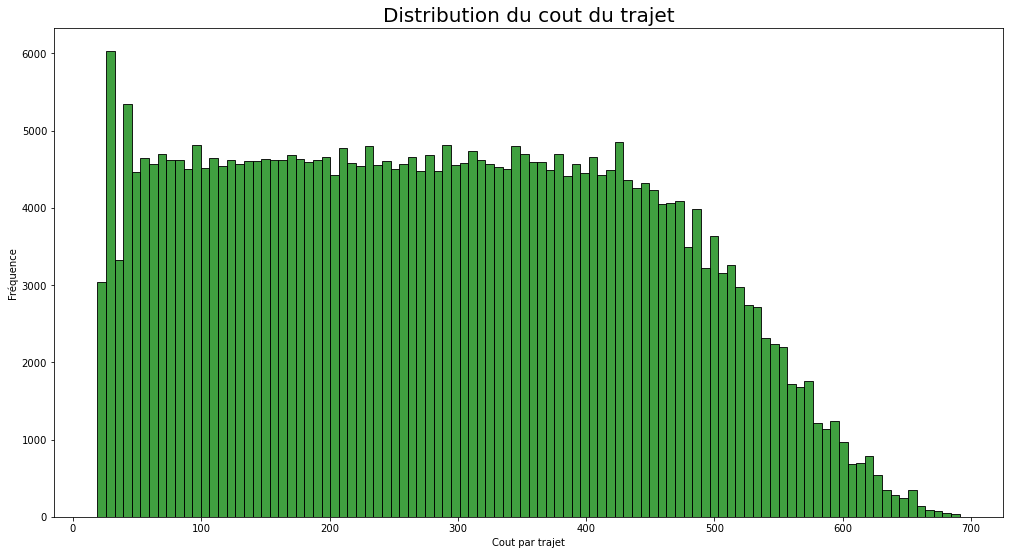

In [34]:
plt.figure(figsize=(17,9))
sns.histplot(data= principal,x="Cost_of_Trip",bins=100 , color= 'green')
plt.title('Distribution du cout du trajet', fontsize=20)
plt.ylabel('Fréquence')
plt.xlabel('Cout par trajet')

On peut maintenant diviser le Dataset en deux (en fonction du type d'entreprise (Pink et Yellow)

In [35]:
# regrouper les données par entreprise
groups = principal.groupby(principal.Company)
pink = groups.get_group("Pink Cab")
yellow = groups.get_group("Yellow Cab")

In [36]:
pink.head()

Transaction_ID Date_of_Travel   Company           City  KM_Travelled  \
2         10102932     2016-11-08  Pink Cab  WASHINGTON DC         15.21   
5         10249981     2017-10-30  Pink Cab  WASHINGTON DC         28.00   
19        10242139     2017-10-19  Pink Cab  WASHINGTON DC         26.78   
29        10143658     2017-02-10  Pink Cab  WASHINGTON DC         42.55   
63        10125156     2016-12-20  Pink Cab  WASHINGTON DC         10.00   

    Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode  Population   Users  \
2          179.33       153.621        52536         Cash      418859  127001   
5          424.20       280.000        52536         Card      418859  127001   
19         371.96       313.326        53683         Card      418859  127001   
29         504.03       489.325        53126         Cash      418859  127001   
63         151.06       104.000        51580         Card      418859  127001   

   Gender  Age  Income_(USD/Month)  
2    Male   24               10606  
5    Male   24               10606  
19   Male   26                9389  
29   Male   24                3032  
63   Male   51                6115

In [37]:
# Premièrement visualisons quelques informations statistiques des deux différents datasets
pink.describe()

Transaction_ID  KM_Travelled  Price_Charged  Cost_of_Trip  \
count    8.471100e+04  84711.000000   84711.000000  84711.000000   
mean     1.022394e+07     22.559917     310.800856    248.148682   
std      1.261782e+05     12.231092     181.995661    135.403345   
min      1.000001e+07      1.900000      15.600000     19.000000   
25%      1.011014e+07     12.000000     159.970000    131.868000   
50%      1.022590e+07     22.440000     298.060000    246.330000   
75%      1.033642e+07     32.960000     441.505000    360.180000   
max      1.043762e+07     48.000000    1623.480000    576.000000   

        Customer_ID    Population          Users           Age  \
count  84711.000000  8.471100e+04   84711.000000  84711.000000   
mean   18422.581577  2.350642e+06  125590.813330     35.322414   
std    18084.830799  2.734890e+06   94593.433659     12.644780   
min        1.000000  2.489680e+05    3643.000000     18.000000   
25%     5317.500000  8.148850e+05   27247.000000     25.000000   
50%     8876.000000  1.595037e+06  144132.000000     33.000000   
75%    27190.000000  1.955130e+06  164468.000000     42.000000   
max    60000.000000  8.405837e+06  302149.000000     65.000000   

       Income_(USD/Month)  
count        84711.000000  
mean         15059.047137  
std           7991.077762  
min           2000.000000  
25%           8371.000000  
50%          14713.000000  
75%          21055.000000  
max          35000.000000

In [38]:
yellow.head()

Transaction_ID Date_of_Travel     Company           City  KM_Travelled  \
0        10001340     2016-01-01  Yellow Cab  WASHINGTON DC         10.20   
1        10020018     2016-03-25  Yellow Cab  WASHINGTON DC          5.94   
3        10164725     2017-04-16  Yellow Cab  WASHINGTON DC          8.08   
4        10188478     2017-06-23  Yellow Cab  WASHINGTON DC         13.80   
6        10261473     2017-11-16  Yellow Cab  WASHINGTON DC         11.60   

   Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode  Population   Users  \
0         202.54      135.8640        52536         Card      418859  127001   
1          88.50       74.1312        52536         Cash      418859  127001   
3         123.21      104.7168        52536         Card      418859  127001   
4         283.74      168.9120        52536         Cash      418859  127001   
6         180.50      144.7680        52536         Cash      418859  127001   

  Gender  Age  Income_(USD/Month)  
0   Male   24               10606  
1   Male   24               10606  
3   Male   24               10606  
4   Male   24               10606  
6   Male   24               10606

In [39]:
yellow.describe()

Transaction_ID   KM_Travelled  Price_Charged   Cost_of_Trip  \
count    2.746810e+05  274681.000000  274681.000000  274681.000000   
mean     1.021978e+07      22.569517     458.181990     297.922004   
std      1.269829e+05      12.234298     288.386166     162.548986   
min      1.000038e+07       1.900000      20.730000      22.800000   
25%      1.011084e+07      11.990000     226.680000     158.400000   
50%      1.021987e+07      22.440000     425.060000     295.596000   
75%      1.032939e+07      32.960000     633.880000     432.432000   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer_ID    Population          Users            Age  \
count  274681.000000  2.746810e+05  274681.000000  274681.000000   
mean    19428.831732  3.373228e+06  168473.246981      35.341112   
std     21830.791423  3.439014e+06  100570.558886      12.578625   
min         1.000000  2.489680e+05    3643.000000      18.000000   
25%      2403.000000  6.712380e+05   80021.000000      25.000000   
50%      6445.000000  1.595037e+06  144132.000000      33.000000   
75%     38916.000000  8.405837e+06  302149.000000      42.000000   
max     60000.000000  8.405837e+06  302149.000000      65.000000   

       Income_(USD/Month)  
count       274681.000000  
mean         15045.669817  
std           7962.727062  
min           2000.000000  
25%           8439.000000  
50%          14676.000000  
75%          21023.000000  
max          34996.000000

<AxesSubplot:xlabel='Income_(USD/Month)', ylabel='Count'>

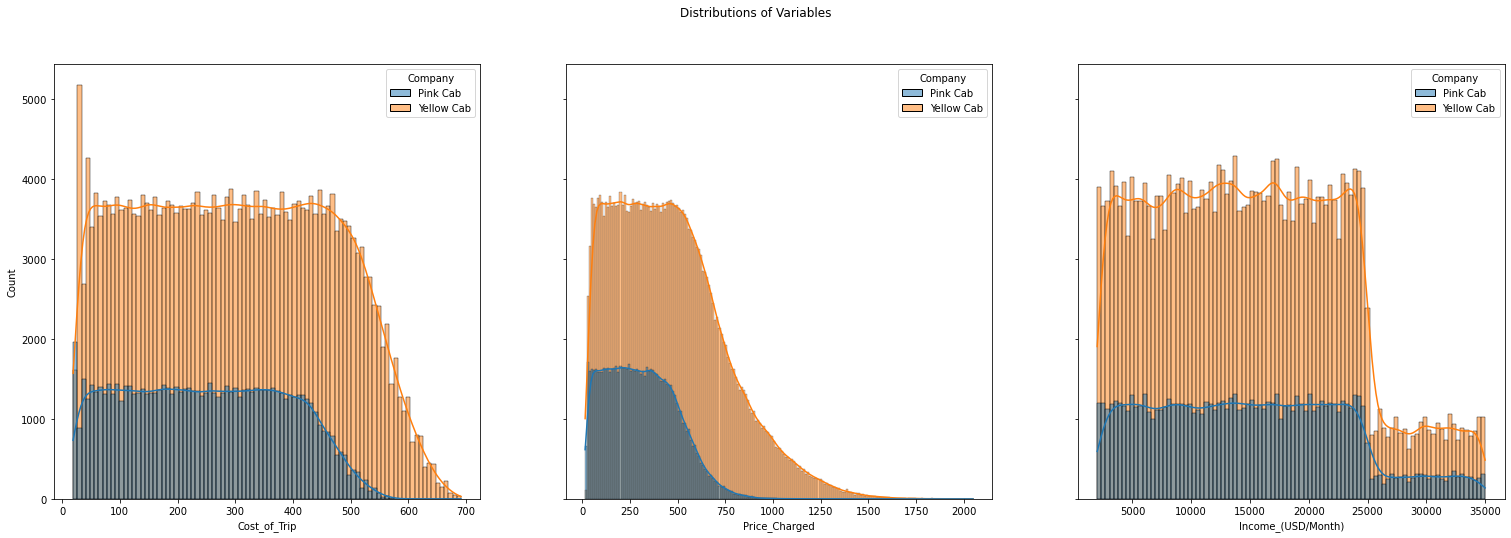

In [40]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 3 , figsize=(26,8), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=principal , x='Cost_of_Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=principal , x='Price_Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[2], data=principal , x='Income_(USD/Month)' , kde = True , hue="Company") 

<AxesSubplot:xlabel='KM_Travelled', ylabel='Count'>

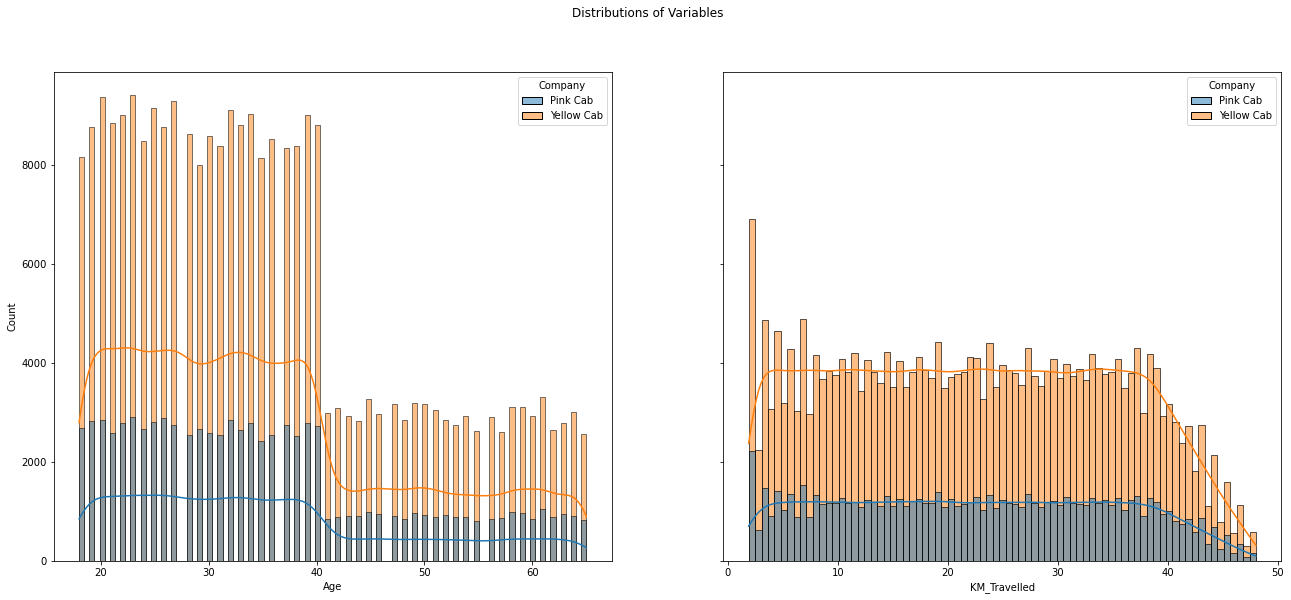

In [41]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 ,figsize=(22,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0],data=principal , x='Age' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=principal , x='KM_Travelled' , kde = True , hue="Company")

<AxesSubplot:xlabel='Users', ylabel='Count'>

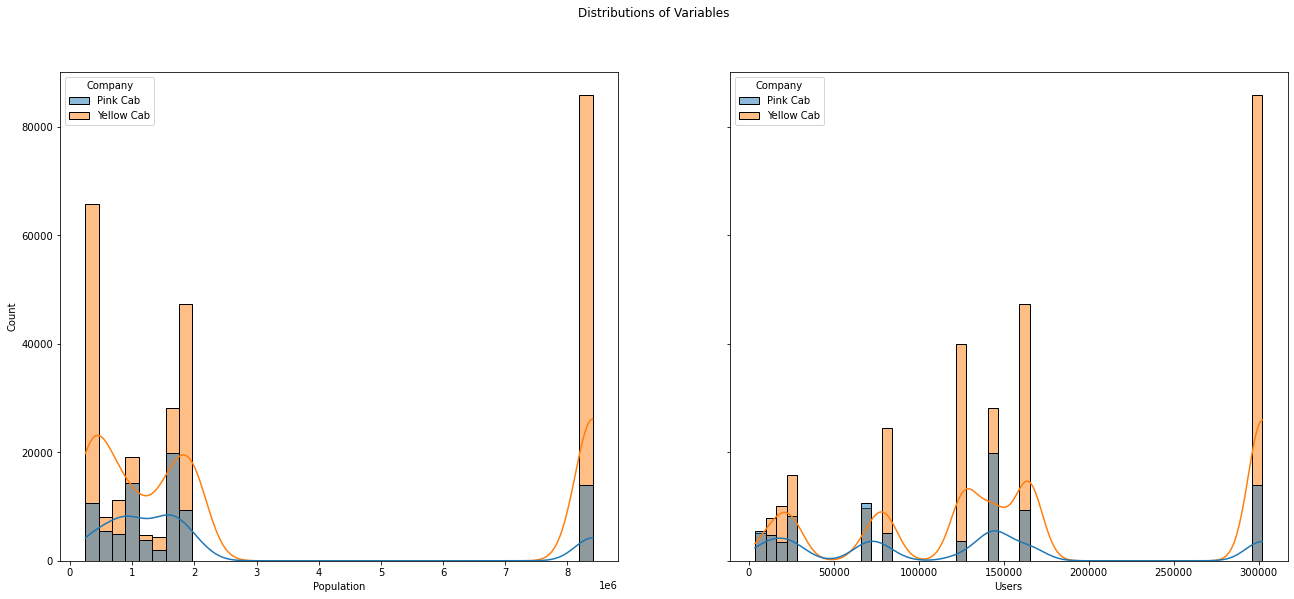

In [42]:
#The KDE curves and distribtion plots of selected variables with respect to Cab Firms drawn below.
fig,axes = plt.subplots(1, 2 , figsize=(22 ,9), sharey=True)
fig.suptitle('Distributions of Variables')
sns.histplot(ax=axes[0], data=principal , x='Population' , kde = True , hue="Company")
sns.histplot(ax=axes[1], data=principal , x='Users' , kde = True , hue="Company")

Text(0, 0.5, 'Yellow Cab')

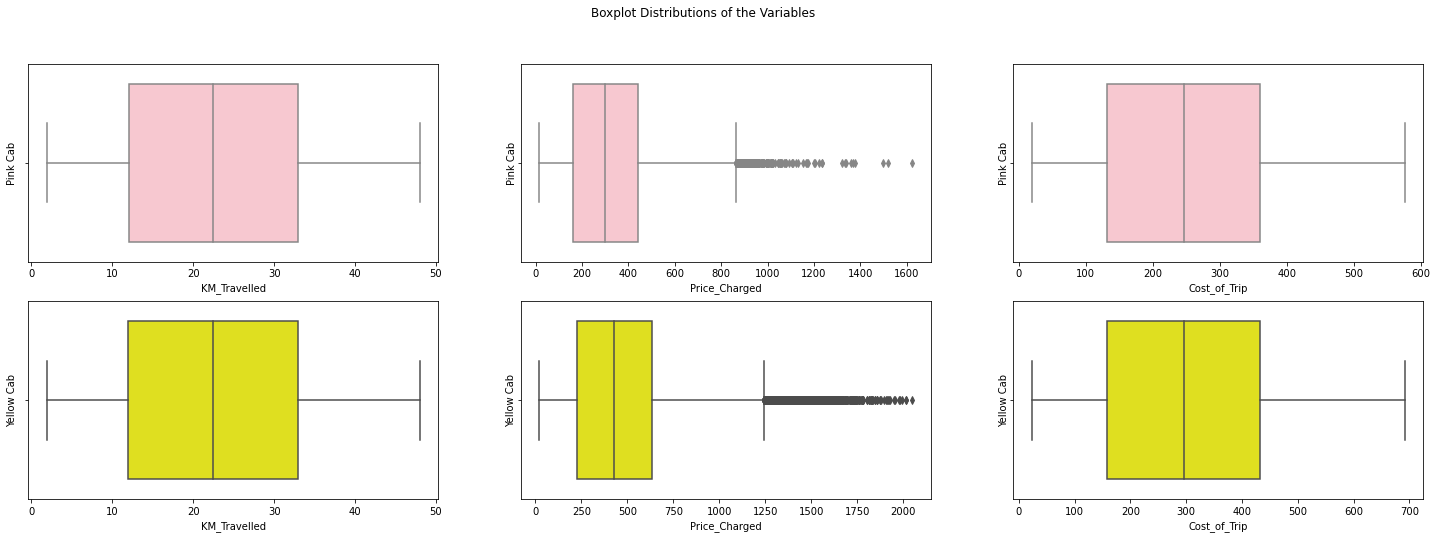

In [43]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' , color='pink',        data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   , color='pink',     data=pink  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' , color='pink',        data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,  color='yellow',      data=yellow ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   , color='yellow',     data=yellow ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,  color='yellow',      data=yellow ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

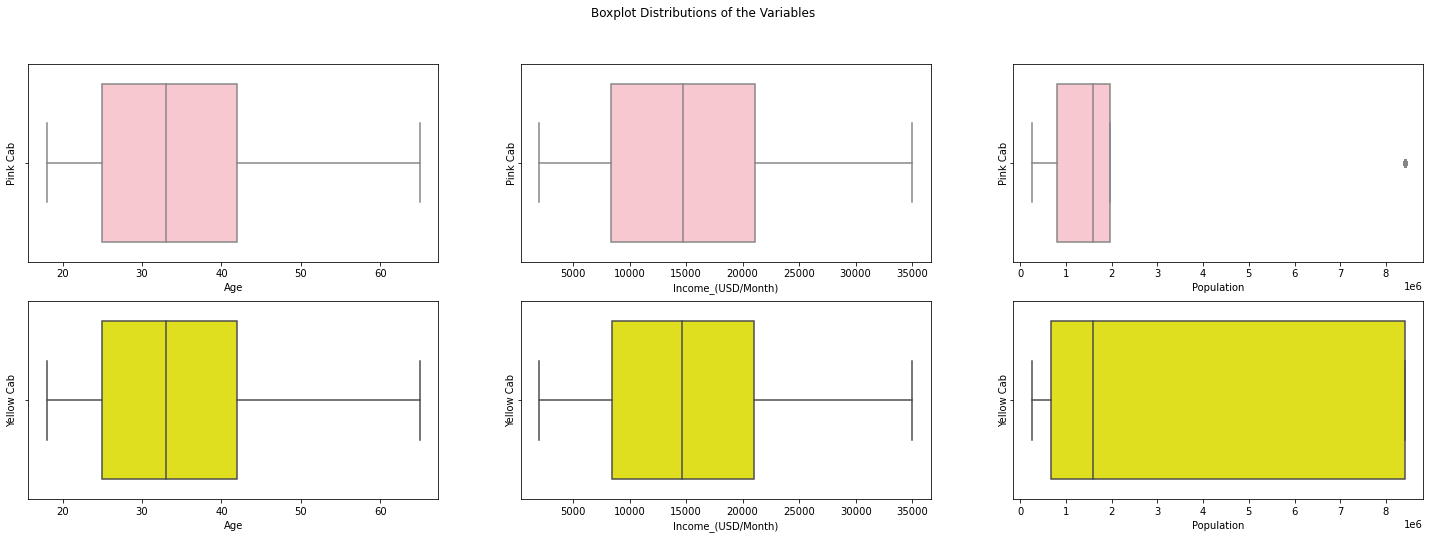

In [44]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')
sns.boxplot(ax=axes[0,0], x='Age' ,  color='pink',                data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Income_(USD/Month)' ,color='pink',   data=pink  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Population' ,      color='pink',     data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='Age' ,               color='yellow',  data=yellow ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Income_(USD/Month)' ,color='yellow',  data=yellow  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Population' ,        color='yellow',  data=yellow ).set_ylabel("Yellow Cab")

Text(0, 0.5, 'Yellow Cab')

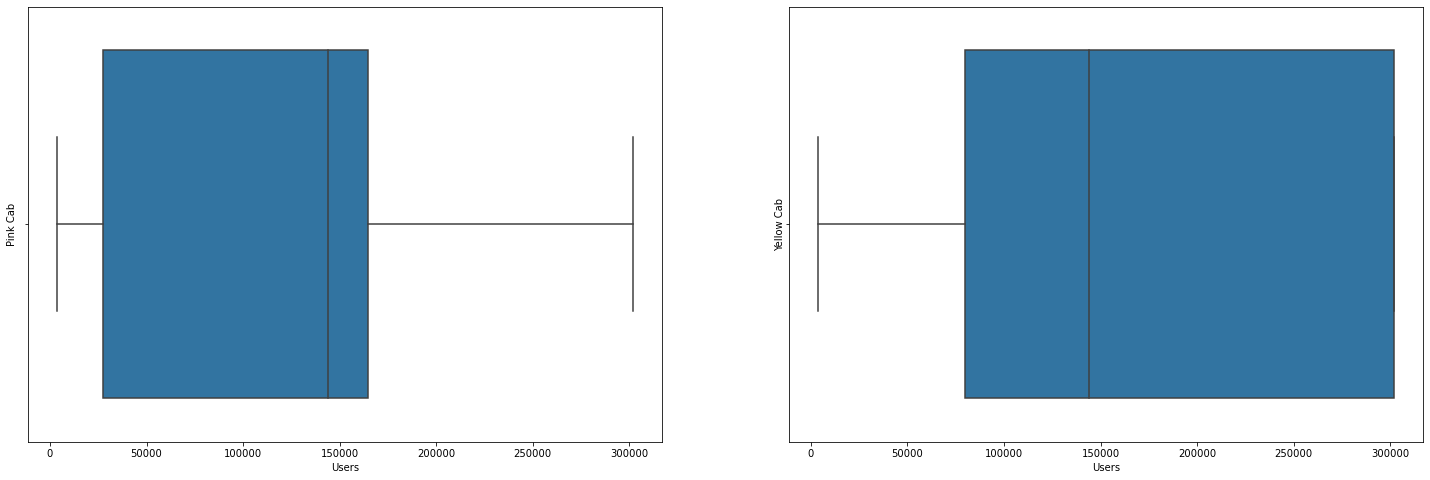

In [45]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
sns.boxplot(ax=axes[0], x='Users' ,    data=pink ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1], x='Users'   ,  data=yellow  ) .set_ylabel("Yellow Cab")


<AxesSubplot:>

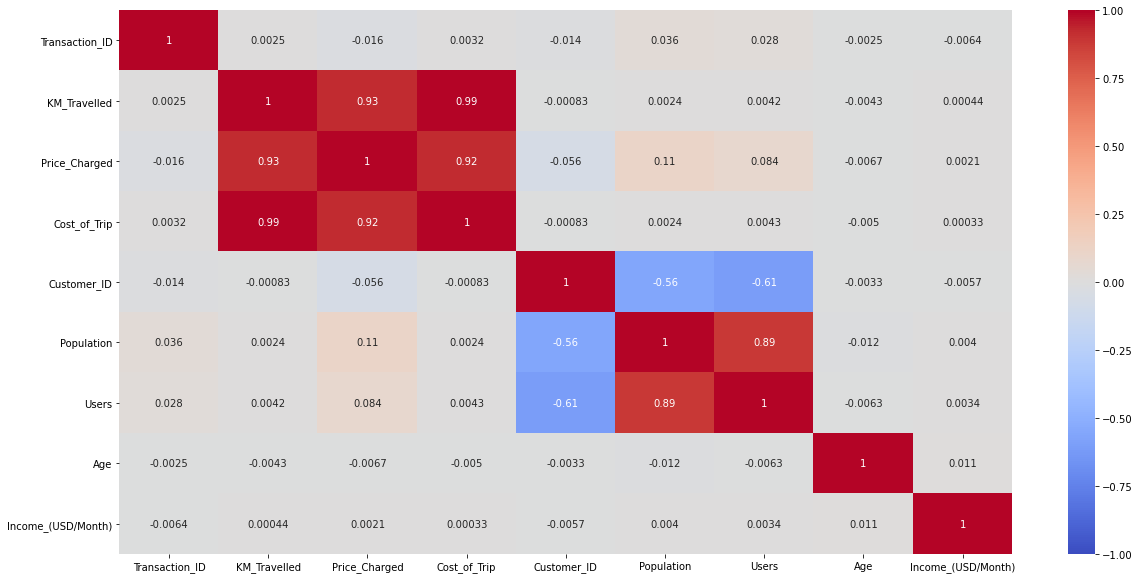

In [46]:
# visualisation des correlations pour l'entreprise Pink en utilisant le Heatmap
Pink_Cab_Corr = pink.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Pink_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

<AxesSubplot:>

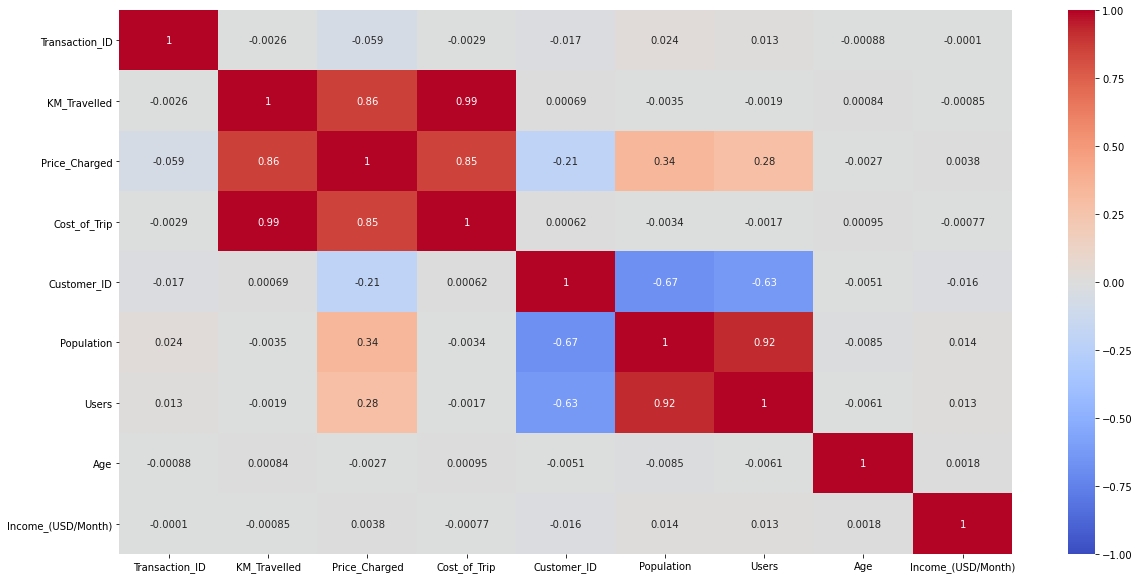

In [47]:
# visualisation des correlations pour l'entreprise Yellow en utilisant le Heatmap
Yellow_Cab_Corr = yellow.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Yellow_Cab_Corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

Text(0.5, 1.0, 'KM_Travelled  - Cost_of_Trip')

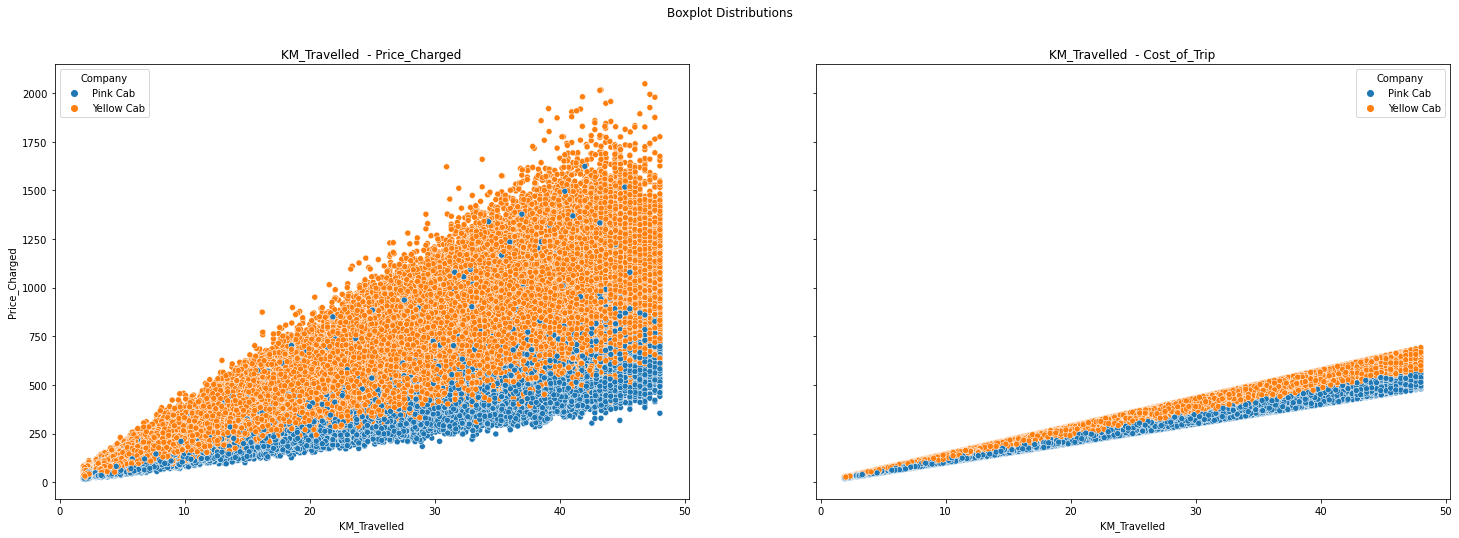

In [48]:
# On peut aussi utiliser le sctter plot pour visualiser la correlation entre les différentes variables
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(ax=axes[0],data=principal, x='KM_Travelled', y='Price_Charged' , hue="Company"  ).set_title("KM_Travelled  - Price_Charged")
sns.scatterplot(ax=axes[1],data=principal, x='KM_Travelled', y='Cost_of_Trip' , hue="Company").set_title("KM_Travelled  - Cost_of_Trip")

Text(0.5, 1.0, 'Price_Charged - Cost_of_Trip')

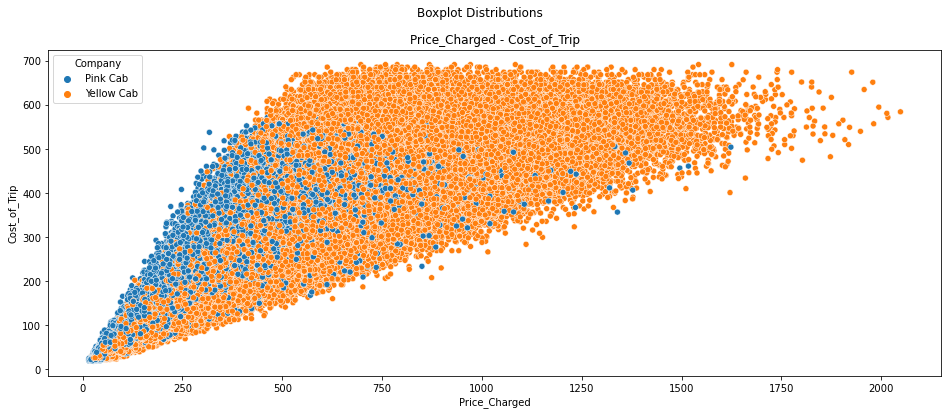

In [49]:

fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(data=principal, x='Price_Charged', y='Cost_of_Trip' , hue="Company").set_title("Price_Charged - Cost_of_Trip")

Text(0.5, 1.0, 'Population  - Users')

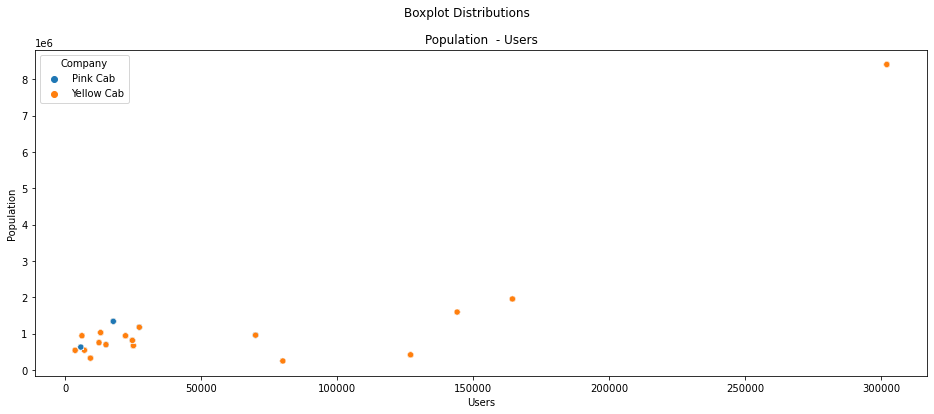

In [50]:
fig,axes = plt.subplots(figsize=(16, 6), sharey=True)
fig.suptitle('Boxplot Distributions')
sns.scatterplot(data=principal, x='Users', y='Population' , hue="Company"  ).set_title("Population  - Users")

Text(0.5, 1.0, 'Users - Price_Charged')

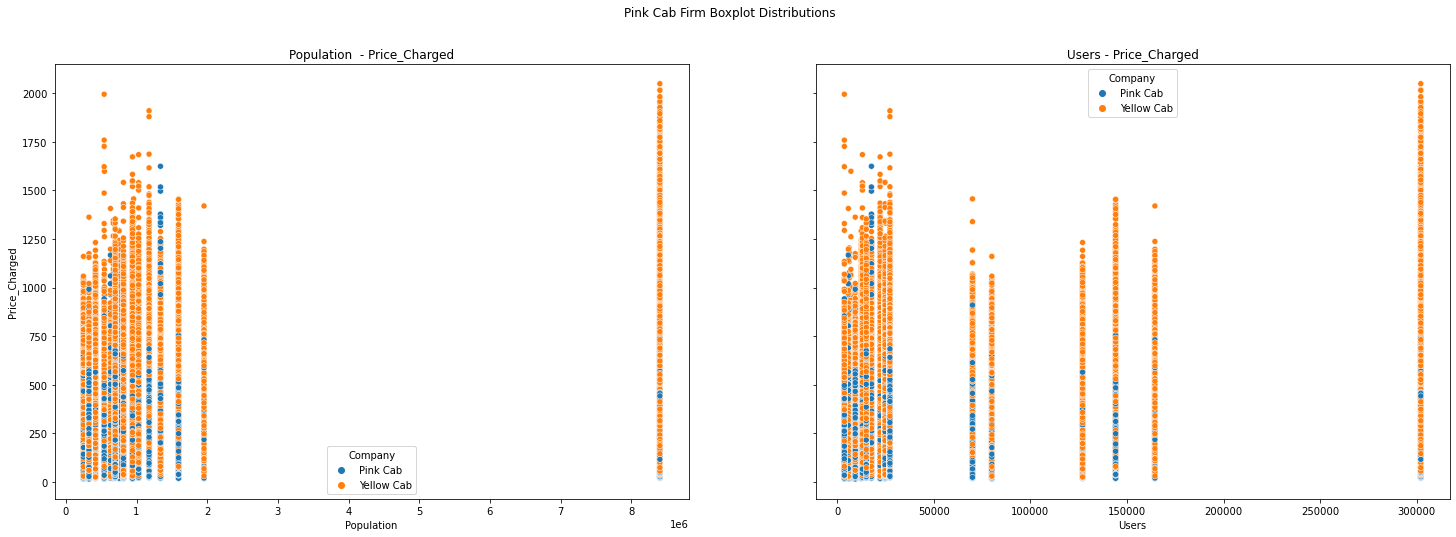

In [51]:
fig,axes = plt.subplots(1, 2, figsize=(25, 8), sharey=True)
fig.suptitle('Pink Cab Firm Boxplot Distributions')
sns.scatterplot(ax=axes[0],data=principal, x='Population', y='Price_Charged' , hue="Company").set_title("Population  - Price_Charged")
sns.scatterplot(ax=axes[1],data=principal, x='Users', y='Price_Charged' , hue="Company").set_title("Users - Price_Charged")

In [52]:

cov1  = np.cov(principal['KM_Travelled'],principal['Price_Charged'])[0][1]
cov2  = np.cov(principal['KM_Travelled'],principal['Cost_of_Trip'])[0][1]
cov3  = np.cov(principal['Price_Charged'],principal['Cost_of_Trip'])[0][1]
cov4  = np.cov(principal['Users'],principal['Population'])[0][1]
cov5  = np.cov(principal['Population'],principal['Price_Charged'])[0][1]
cov6  = np.cov(principal['Users'],principal['Price_Charged'])[0][1]

print('Covariance for  KM_Travelled - Price_Charged : '+ str(cov1))
print('Covariance for  KM_Travelled - Cost_of_Trip : '+ str(cov2))
print('Covariance for  Price_Charged - Cost_of_Trip : '+ str(cov3))
print('Covariance for  Users - Population : '+ str(cov4))
print('Covariance for  Population - Price_Charged : '+ str(cov5))
print('Covariance for  Users - Price_Charged : '+ str(cov6))

Covariance for  KM_Travelled - Price_Charged : 2805.3070413080595
Covariance for  KM_Travelled - Cost_of_Trip : 1897.735748373694
Covariance for  Price_Charged - Cost_of_Trip : 37272.949046002745
Covariance for  Users - Population : 306082774584.7919
Covariance for  Population - Price_Charged : 297071855.0581954
Covariance for  Users - Price_Charged : 7777261.839139357


In [53]:
# Calcul des coefficients de correlation
from scipy import stats
pcorr_coef1 , _ = stats.pearsonr(principal['KM_Travelled'],principal['Price_Charged'])
pcorr_coef2 , _ = stats.pearsonr(principal['KM_Travelled'],principal['Cost_of_Trip'])
pcorr_coef3 , _ = stats.pearsonr(principal['Price_Charged'],principal['Cost_of_Trip'])
pcorr_coef4 , _ = stats.pearsonr(principal['Users'],principal['Population'])
pcorr_coef5 , _ = stats.pearsonr(principal['Population'],principal['Price_Charged'])
pcorr_coef6 , _ = stats.pearsonr(principal['Users'],principal['Price_Charged'])

print('pearson correlation coefficient de  KM_Travelled - Price_Charged : '+ str(pcorr_coef1))
print('pearson correlation coefficient de  KM_Travelled - Cost_of_Trip : '+ str(pcorr_coef2))
print('pearson correlation coefficient de  Price_Charged - Cost_of_Trip : '+ str(pcorr_coef3))
print('pearson correlation coefficient de  Users - Population : '+ str(pcorr_coef4))
print('pearson correlation coefficient de  Population - Price_Charged : '+ str(pcorr_coef5))
print('pearson correlation coefficient de  Users - Price_Charged : '+ str(pcorr_coef6))


pearson correlation coefficient de  KM_Travelled - Price_Charged : 0.8357531580209456
pearson correlation coefficient de  KM_Travelled - Cost_of_Trip : 0.981848382318995
pearson correlation coefficient de  Price_Charged - Cost_of_Trip : 0.8598117262915712
pearson correlation coefficient de  Users - Population : 0.9154903444754623
pearson correlation coefficient de  Population - Price_Charged : 0.32658917101916096
pearson correlation coefficient de  Users - Price_Charged : 0.2810605356919055


##  => Interpretation
    Nous remarquons une forte correlation entre :
    [KM de voyage et prix de charge], 
    [KM de voyage et prix par voyage], 
    [Prix de charge et prix par voyage], 
    [Clientet la population]

In [54]:
# Obtained spearman rank correlations and p - values for given features. 
spearman_rank_coeff1   = stats.spearmanr(principal['KM_Travelled'],principal['Price_Charged'])
spearman_rank_coeff2   = stats.spearmanr(principal['KM_Travelled'],principal['Cost_of_Trip'])
spearman_rank_coeff3   = stats.spearmanr(principal['Price_Charged'],principal['Cost_of_Trip'])
spearman_rank_coeff4   = stats.spearmanr(principal['Users'],principal['Population'])
spearman_rank_coeff5   = stats.spearmanr(principal['Population'],principal['Price_Charged'])
spearman_rank_coeff6   = stats.spearmanr(principal['Users'],principal['Price_Charged'])

print('spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : '+ str(spearman_rank_coeff1))
print('spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : '+ str(spearman_rank_coeff2))
print('spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : '+ str(spearman_rank_coeff3))
print('spearman rank coefficient coefficient for  Users - Population : '+ str(spearman_rank_coeff4))
print('spearman rank coefficient coefficient for  Population - Price_Charged : '+ str(spearman_rank_coeff5))
print('spearman rank coefficient coefficient for  Users - Price_Charged : '+ str(spearman_rank_coeff6))

spearman rank coefficient coefficient for  KM_Travelled - Price_Charged : SpearmanrResult(correlation=0.8929579061229217, pvalue=0.0)
spearman rank coefficient coefficient for  KM_Travelled - Cost_of_Trip : SpearmanrResult(correlation=0.9845458363254245, pvalue=0.0)
spearman rank coefficient coefficient for  Price_Charged - Cost_of_Trip : SpearmanrResult(correlation=0.9135811393768479, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Population : SpearmanrResult(correlation=0.8742482215995742, pvalue=0.0)
spearman rank coefficient coefficient for  Population - Price_Charged : SpearmanrResult(correlation=0.20756103314228547, pvalue=0.0)
spearman rank coefficient coefficient for  Users - Price_Charged : SpearmanrResult(correlation=0.1982681085669414, pvalue=0.0)


# Analyse des données inférentielles

In [55]:
data0 = principal.groupby("Company").count()

fig1 = px.pie(data0,
                        values=data0.Users,
                        names=data0.index ,title="Pink & Yellow Cab Firm Total Users Overview"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

  ## => Interpretation
  On remarque l'occupation des presque 1/3 du marché par yellow Cab

In [56]:
data1_0 = principal[principal["Company"] == "Pink Cab"].groupby("City").count()
data1_1 = principal[principal["Company"] == "Yellow Cab"].groupby("City").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data1_0.index,
                    y=data1_0['Users'],
                    name='Pink Cab',
                    marker_color='indianred' 
                    ))            
fig.add_trace(go.Bar(
                    x=data1_1.index,
                    y=data1_1['Users'],
                    name='Yellow Cab',
                    marker_color='blue'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Distribution des utilisateurs en fonction des villes" )

## => Interpretation
    Par ville on voit le nombre élevé d'investiseurs de Yellow  et une forte concentration a Newyork, chicago washington

In [57]:
data2_0 = principal.groupby("City").count()
fig1 = px.pie(data2_0,
                        values=data2_0.Users,
                        names=data2_0.index ,title="Utilisateurs par ville"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

## => Inteprétation
Le diagramme montre les pourcentages des utilisateurs répartis en fonction des villes respectives

In [58]:

principal["User_Pop_Ratio"] = principal["Users"] / principal["Population"]
principal["Profit_of_Trip"] = principal["Price_Charged"] - principal["Cost_of_Trip"]
data2_1 = principal.groupby("City").sum()
fig1 = px.pie(data2_1,
                        values=data2_1.Profit_of_Trip,
                        names=data2_1.index ,title="Profit par ville"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

## => Inteprétation
    Le graphe secteur  par rapport au profit par voyage et par ville montre le pourcentage élevé à New York

In [59]:
pinkData = principal[principal['Company'] == 'Pink Cab']
yellowData = principal[principal['Company'] == 'Yellow Cab']

dict1 = {"Pink Cab" : [pinkData["Profit_of_Trip"].sum()] ,"Yellow Cab" : [yellowData["Profit_of_Trip"].sum()] }

data2_2 = pd.DataFrame(dict1).T

fig1 = px.pie(data2_2,
                        values=data2_2[0],
                        names=data2_2.index ,title="Profit total de chaque entreprise"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

## => Interprétation
    Yellow qui occupe 89% du profit par voyage

In [60]:
data3_0 = principal.groupby("Gender").count()
fig1 = px.pie(data3_0,
                        values=data3_0.Users,
                        names=data3_0.index ,title="Pourcentage d'utilisateurs en fonction du sexe"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )


## => Interprétation
    On remarque que c'est le sexe masculin est le plus dominant en tant qu'utilisateur des services de taxi.

In [61]:
data3_1 = principal[principal["Company"] == "Pink Cab"].groupby("Gender").count()
data3_2 = principal[principal["Company"] == "Yellow Cab"].groupby("Gender").count()

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data3_1.index,
                    y=data3_1['Users'],
                    name='Pink Cab',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data3_2.index,
                    y=data3_2['Users'],
                    name='Yellow Cab',
                    marker_color='orange'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Distribution des utilisateurs en fonction du sexe" )

## => Interprétation
   En comparant le taux d'implication des deux sexes dans chacune des marques, on note une forte domination de Yellow.

In [62]:
data3_3 = principal.groupby("Payment_Mode").count()
fig1 = px.pie(data3_3,
                        values=data3_3.Users,
                        names=data3_3.index ,title="Pourcentage des méthodes de paiement"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

## => Interprétation
     60% de payements par carte contre 40% en espèce

In [63]:
ageGroup_Young  = principal[(principal ["Age"] >= 18) & (principal ["Age"] < 25)].count()
ageGroup_Middle = principal[(principal ["Age"] >= 25) & (principal["Age"] < 40)].count()
ageGroup_Old    = principal[(principal ["Age"] >= 40) & (principal ["Age"] <= 65)].count()

dict = {"25 > Age >= 18 (YOUNG)" : ageGroup_Young ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle , "65 >= Age >= 40 (OLD)" : ageGroup_Old }
data4_0 = pd.DataFrame(dict).T

fig1 = px.pie(data4_0 ,
                        values=data4_0.Users,
                        names=data4_0.index ,title="Utilisateurs par groupes d'age"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 ) 

## => Interpretation
     on que c'est des personnes âgé de 25 à 40 qui investissent plus

In [64]:
ageGroup_Young_Pink    = principal[(principal ["Age"] >= 18) & (principal ["Age"] < 25) & (principal["Company"] == "Pink Cab")] .count()
ageGroup_Middle_Pink   = principal[(principal ["Age"] >= 25) & (principal ["Age"] < 40) & (principal["Company"] == "Pink Cab")].count()
ageGroup_Old_Pink      = principal[(principal ["Age"] >= 40) & (principal ["Age"] <= 65) & (principal["Company"] == "Pink Cab")].count()

ageGroup_Young_Yellow  = principal[(principal ["Age"] >= 18) & (principal ["Age"] < 25) & (principal["Company"] == "Yellow Cab")] .count()
ageGroup_Middle_Yellow = principal[(principal ["Age"] >= 25) & (principal ["Age"] < 40) & (principal["Company"] == "Yellow Cab")].count()
ageGroup_Old_Yellow    = principal[(principal ["Age"] >= 40) & (principal ["Age"] <= 65) & (principal["Company"] == "Yellow Cab")].count()

dict0 = { "25 > Age >= 18 (YOUNG)" : ageGroup_Young_Pink ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle_Pink , "65 >= Age >= 40 (OLD)" : ageGroup_Old_Pink }

dict1 = { "25 > Age >= 18 (YOUNG)" : ageGroup_Young_Yellow ,"40 > Age >= 25 (MIDDLE)" : ageGroup_Middle_Yellow , "65 >= Age >= 40 (OLD)" : ageGroup_Old_Yellow }

data4_1 = pd.DataFrame(dict0).T
data4_2 = pd.DataFrame(dict1).T

fig = go.Figure()
fig.add_trace(go.Bar(
                    x=data4_1.index,
                    y=data4_1['Users'],
                    name='Pink ',
                    marker_color='pink' 
                    ))            
fig.add_trace(go.Bar(
                    x=data4_2.index,
                    y=data4_2['Users'],
                    name='Yellow ',
                    marker_color='orange'
                    ))
fig.update_layout(
    yaxis_title="Users",
    title="Distribution des utilisateurs en fonction de l'age" )

## => Interpretation
    Le graphe pour la comparaison des deux entreprice par tranche d'âge. On remarque que la tranche d'age 25 à 40 ans qui investissent plus dans yellow cab

In [65]:
data5_0 = principal.groupby("City")["Income_(USD/Month)"].mean()
data5_0 = pd.DataFrame(data5_0)
fig1 = px.pie(data5_0,
                        values=data5_0["Income_(USD/Month)"],
                        names=data5_0.index ,title="Pourcentage de gain par ville"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

In [66]:
data5_1 = principal.groupby("Company")["Income_(USD/Month)"].mean()
data5_1 = pd.DataFrame(data5_1)
fig1 = px.pie(data5_1,
                        values=data5_1["Income_(USD/Month)"],
                        names=data5_1.index ,title="Moyenne de gain"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

In [67]:
data5_2 = principal.groupby("City")["KM_Travelled"].sum()
data5_2 = pd.DataFrame(data5_2)
fig1 = px.pie(data5_2,
                        values=data5_2["KM_Travelled"],
                        names=data5_2.index ,title="Pourcentage des KM parcourus par ville"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

## => Interpretation
    Le graphe du total de voyage en KM par ville montre une elevation de dans NEW YORK

In [68]:
data5_3 = principal.groupby("Company")["KM_Travelled"].sum()
data5_3 = pd.DataFrame(data5_3)
fig1 = px.pie(data5_3,
                        values=data5_3["KM_Travelled"],
                        names=data5_3.index ,title="Pourcentage des KM parcourus"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

## => Interpretaion
    Par KM de voyage on remaque que Yellow Cab represente 76% et 24% pour Prink Cab 

In [69]:
principal["Profit_per_KM"] = principal["Profit_of_Trip"].sum() / principal["KM_Travelled"].sum()
data5_4 = principal.groupby("City")["Profit_per_KM"].mean()
data5_4 = pd.DataFrame(data5_4)

fig1 = px.pie(data5_4,
                        values=data5_4["Profit_per_KM"],
                        names=data5_4.index ,title="Moyenne du profit par ville"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

In [70]:
data5_5 = principal.groupby("Company")["Profit_per_KM"].mean()
data5_5 = pd.DataFrame(data5_5)

fig1 = px.pie(data5_5,
                        values=data5_5["Profit_per_KM"],
                        names=data5_5.index ,title="Moyenne du profit par KM"
                        )
fig1.update_traces(
                        textposition='inside',
                        textinfo='percent+label'
                        )
fig1.update_layout( width = 1100 , height = 600 )

In [71]:
MasterData = principal 
MasterData['Year_of_Travel'] = MasterData['Date_of_Travel'].dt.year
MasterData['Month_of_Travel'] = MasterData['Date_of_Travel'].dt.month
MasterData['Day_of_Travel'] = MasterData['Date_of_Travel'].dt.day

MasterData_TimeSeries=MasterData.set_index('Date_of_Travel')
MasterData_TimeSeries.head(10)

Transaction_ID     Company           City  KM_Travelled  \
Date_of_Travel                                                            
2016-01-01            10001340  Yellow Cab  WASHINGTON DC         10.20   
2016-03-25            10020018  Yellow Cab  WASHINGTON DC          5.94   
2016-11-08            10102932    Pink Cab  WASHINGTON DC         15.21   
2017-04-16            10164725  Yellow Cab  WASHINGTON DC          8.08   
2017-06-23            10188478  Yellow Cab  WASHINGTON DC         13.80   
2017-10-30            10249981    Pink Cab  WASHINGTON DC         28.00   
2017-11-16            10261473  Yellow Cab  WASHINGTON DC         11.60   
2017-11-29            10270018  Yellow Cab  WASHINGTON DC          6.06   
2018-04-07            10317783  Yellow Cab  WASHINGTON DC         33.25   
2018-05-01            10326349  Yellow Cab  WASHINGTON DC         23.75   

                Price_Charged  Cost_of_Trip  Customer_ID Payment_Mode  \
Date_of_Travel                                                          
2016-01-01             202.54      135.8640        52536         Card   
2016-03-25              88.50       74.1312        52536         Cash   
2016-11-08             179.33      153.6210        52536         Cash   
2017-04-16             123.21      104.7168        52536         Card   
2017-06-23             283.74      168.9120        52536         Cash   
2017-10-30             424.20      280.0000        52536         Card   
2017-11-16             180.50      144.7680        52536         Cash   
2017-11-29              84.71       81.4464        52536         Cash   
2018-04-07             556.72      426.9300        52536         Card   
2018-05-01             448.80      342.0000        52536         Card   

                Population   Users Gender  Age  Income_(USD/Month)  \
Date_of_Travel                                                       
2016-01-01          418859  127001   Male   24               10606   
2016-03-25          418859  127001   Male   24               10606   
2016-11-08          418859  127001   Male   24               10606   
2017-04-16          418859  127001   Male   24               10606   
2017-06-23          418859  127001   Male   24               10606   
2017-10-30          418859  127001   Male   24               10606   
2017-11-16          418859  127001   Male   24               10606   
2017-11-29          418859  127001   Male   24               10606   
2018-04-07          418859  127001   Male   24               10606   
2018-05-01          418859  127001   Male   24               10606   

                User_Pop_Ratio  Profit_of_Trip  Profit_per_KM  Year_of_Travel  \
Date_of_Travel                                                                  
2016-01-01            0.303207         66.6760       6.081963            2016   
2016-03-25            0.303207         14.3688       6.081963            2016   
2016-11-08            0.303207         25.7090       6.081963            2016   
2017-04-16            0.303207         18.4932       6.081963            2017   
2017-06-23            0.303207        114.8280       6.081963            2017   
2017-10-30            0.303207        144.2000       6.081963            2017   
2017-11-16            0.303207         35.7320       6.081963            2017   
2017-11-29            0.303207          3.2636       6.081963            2017   
2018-04-07            0.303207        129.7900       6.081963            2018   
2018-05-01            0.303207        106.8000       6.081963            2018   

                Month_of_Travel  Day_of_Travel  
Date_of_Travel                                  
2016-01-01                    1              1  
2016-03-25                    3             25  
2016-11-08                   11              8  
2017-04-16                    4             16  
2017-06-23                    6             23  
2017-10-30                   10             30  
2017-11-16                   11 

In [72]:
years_list = ["2016","2017","2018"]

def year_pink():
    
    
    
    profit_2016 = round ( MasterData[(MasterData['Year_of_Travel'] == 2016) & (MasterData.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2017 = round ( MasterData[(MasterData['Year_of_Travel'] == 2017) & (MasterData.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2018 = round ( MasterData[(MasterData['Year_of_Travel'] == 2018) & (MasterData.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    
    profits = [profit_2016, profit_2017, profit_2018]
    
    return profits

   

def year_yellow():
    
    
    profit_2016 = round ( MasterData[(MasterData['Year_of_Travel'] == 2016) & (MasterData.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2017 = round ( MasterData[(MasterData['Year_of_Travel'] == 2017) & (MasterData.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2018 = round ( MasterData[(MasterData['Year_of_Travel'] == 2018) & (MasterData.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    
    profits = [profit_2016, profit_2017, profit_2018]
    
    return profits
   

yellow = year_yellow()
pink = year_pink()
zippedy = zip(yellow,years_list)
zippedp = zip(pink,years_list)

datap = pd.DataFrame(zippedp,columns=["Profit","Year"])
datay = pd.DataFrame(zippedy,columns=["Profit","Year"])

fig = go.Figure()
fig.add_trace(go.Scatter(x=datay.Year, y=datay.Profit,
                    mode='lines+markers',
                    name='Yellow'
                    ))
fig.add_trace(go.Scatter(x=datap.Year, y=datap.Profit,
                    mode='lines+markers',
                    name='Pink '
                     ))
fig.update_layout(
    title="Profit annuel",
    xaxis_title="Année",
    yaxis_title="Profits (en Millions)",
    legend_title="Cab Companies",
)

fig.show()

# => Interpretation
O


# Conclusion

Nous avons évalué les deux compagnies de taxis sur les points suivants :
1. Analyse des bénéfices
Bénéfices : des bénéfices plus élevés au fil du temps et moins de fluctuations mensuelles
Bénéfices sur les trajets : meilleur taux de PoR dans le temps. Yellow Cab a 2,5 bénéfices supplémentaires par rapport au trajet
Bénéfices Citywise : Yellow Cab a une plus grande part de marché dans chaque ville.
Manèges rentables : en supposant que sur un taux de 80 %, l'entreprise fonctionne bien. Yellow Cab a une haute performance parmi toutes les villes. En revanche,
Pink Cab n'est pas performant dans 8 villes.
2. Analyse de la demande
Demande : Yellow Cab a plus que triplé la demande de Pink Cab Company

3. Analyse des clients
Taux de fidélité : En supposant que les deux classes, Yellow Cab a un taux de fidélité élevé et un taux de fidélité moyen plus élevés.
Répartition des modes de paiement : les deux sociétés présentent la même répartition des modes de paiement dans le temps, par ville et par âge.

Donc sur la base des points ci-dessus, nous recommanderons formellement Yellow  pour un investissement qui serait rentable